# Final Project - Ironhack Data Analytics Bootcamp
# Spotify Popularity Prediction Model - Machine Learning

#### Importing the packages to be used

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Importing the datasets

In [3]:
Clas=pd.read_csv('Spotify_CleanWithOutliers')

In [4]:
ClasOut=pd.read_csv('Spotify_CleanWithoutOutliers')

### Preparation of training and testing samples

We now define the features (X) and the target (y):

In [7]:
y=Clas['popularity']
X=Clas.drop(columns=['popularity', 'Unnamed: 0' ])

We can now specify what part of our dataset is the target and what part corresponds to the features:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
len(X_train), len(X_test), len(y_train), len(y_test)

(71770, 7975, 71770, 7975)

And same for the option without outliers:

In [10]:
yOut=ClasOut['popularity']
XOut=ClasOut.drop(columns=['popularity', 'Unnamed: 0'])

In [12]:
XOut_train, XOut_test, yOut_train, yOut_test = train_test_split(XOut,yOut,test_size=0.1)
len(XOut_train), len(XOut_test), len(yOut_train), len(yOut_test)

(96018, 10669, 96018, 10669)

### Other steps before the real action

We also define a function to represent the confusion matrix in later steps

In [50]:
def confusionMatrixHeatmap(cm, labels):
    totals = cm.sum(axis=1)
    cm_total = (np.ones(cm.shape)*totals).transpose()
    m2 = np.round(((cm/cm_total)*100).astype(float))
    np.set_printoptions(precision=2)
    f, ax=plt.subplots(figsize=(7.5,5))
    sns.heatmap(m2, annot=True, linecolor='white', linewidths=0.2,
                xticklabels=labels, yticklabels=labels)
    ax.set_title('CONFUSION MATRIX')
    plt.xlabel('Classified as')
    plt.ylabel('Real Values')
labl=['Not Popular' ,'Popular']

# Model Creation, Train and Testing

### Linear Regression Model

We know the correlation between the features and the targer are very low, this condition makes us expect a non-linear regressive model. However, it's never a bad idea to double check. The code below will return a very low score representative of the innacuracy of the current model:

In [14]:
linModel=linear_model.LinearRegression()
linModel.fit(X, y)
display(linModel.score(X, y))

0.1326297313892354

## Classification models

## 1. Logistic Regression Model

With Outliers:

#### Grid Search and Model Fitting

In [24]:
logModel=LogisticRegression()
parameterslog={'tol': [0.001, 0.01, 0.1], 'C': [10,5,1,0.1],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }
GS= GridSearchCV(logModel, parameterslog, n_jobs=-1)
GS.fit(X_train, y_train)
print('The parameters combination that would give best accuracy is : ')
print(GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 5, 'solver': 'liblinear', 'tol': 0.01}


We now apply the best parameters possible returned by the Grid Search

In [25]:
logModel=LogisticRegression(C=5, solver='liblinear' , tol=0.001)
logModel.fit(X_train, y_train)
y_pred_test_log=logModel.predict(X_test)
display('The accuracy is:')
display(metrics.accuracy_score(y_test, y_pred_test_log))

'The score is:'

0.6516614420062696

'The accuracy is:'

0.6516614420062696

#### Cross Validation

In [27]:
# cv=10 because it's been scientifically demonstrated that value is optimum for classification
# scoring is set to accuracy since accuracy is the evaluation matrix 
scoreslog = cross_val_score(logModel, X, y, cv=10, scoring='accuracy')
display(scoreslog)
print("The mean score for cross validation is %s"%(scoreslog.mean()))


array([0.75611285, 0.65730408, 0.6230721 , 0.60827586, 0.59523511,
       0.64112853, 0.61730408, 0.60872837, 0.65558761, 0.78389565])

The mean score for cross validation is 0.654664422506322


array([[2907,  895],
       [1883, 2290]])

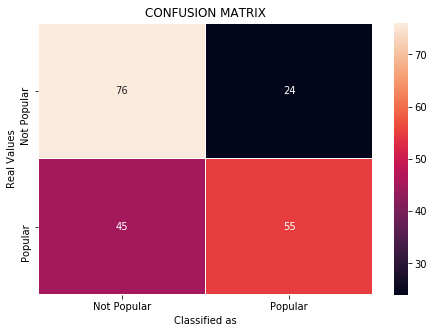

In [51]:
cmlog=confusion_matrix(y_test, y_pred_test_log)
display(cmlog)
confusionMatrixHeatmap(cmlog, labl)

Without Outliers:

In [29]:
logOutModel=LogisticRegression()
logOutModel.fit(XOut_train, yOut_train)
yOut_pred_test_log=logOutModel.predict(XOut_test)
display('The accuracy is:')
display(metrics.accuracy_score(yOut_test, yOut_pred_test_log))

'The score is:'

0.37829224857062516

'The accuracy is:'

0.37829224857062516

The score without outlier is much smaller hence it is not worth working with this option anymore

## 2. SVC

SVC scales very bad so we have decided to take a sample of a 10000 items, to make the model training faster. This time we just work with the option containing outliers.

In [30]:
svcSample=Clas.sample(10000)
ysvc=svcSample['popularity']
Xsvc=svcSample.drop(columns=['popularity', 'Unnamed: 0'])
Xsvc_train, Xsvc_test, ysvc_train, ysvc_test = train_test_split(Xsvc,ysvc,test_size=0.1)
len(Xsvc_train), len(Xsvc_test), len(ysvc_train), len(ysvc_test)

(9000, 1000, 9000, 1000)

In [45]:
svcModel=SVC()
parameterssvc={'gamma': [0.01, 0.02, 0.09, 0.05, 0.1, 0.15, 0.2] }
GSsvc= GridSearchCV(svcModel, parameterssvc, n_jobs=-1)
GSsvc.fit(Xsvc_train, ysvc_train)
print('The parameters combination that would give best accuracy is : ')
print(GSsvc.best_params_)

The parameters combination that would give best accuracy is : 
{'gamma': 0.1}


We now apply the best parameters possible returned by the Grid Search

In [48]:
svcModel=SVC(gamma=0.1)
svcModel.fit(Xsvc_train,ysvc_train)
ysvc_pred_test=svcModel.predict(Xsvc_test)
display('The accuracy is:')
display(metrics.accuracy_score(ysvc_test, ysvc_pred_test))

'The accuracy is:'

0.635

array([[353, 133],
       [232, 282]])

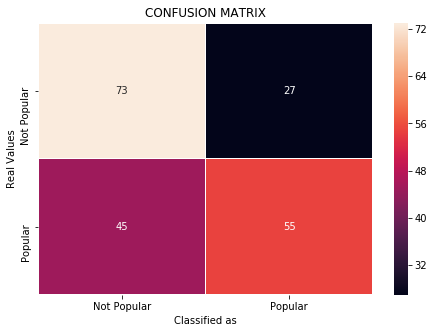

In [52]:
cmsvc=confusion_matrix(ysvc_test, ysvc_pred_test)
display(cmsvc)
confusionMatrixHeatmap(cmsvc, labl)

## Neural Networks: Multi-layer Perceptron

With Outliers:

In [54]:
mlpModel=MLPClassifier()
parametersmlp={'activation': ['identity', 'logistic', 'tanh', 'relu'], 
               'solver': ['lbfgs', 'sgd', 'adam']}
GSmlp= GridSearchCV(mlpModel, parametersmlp, n_jobs=-1)
GSmlp.fit(X_train, y_train)
print('The parameters combination that would give best accuracy is : ')
print(GS.best_params_)


The parameters combination that would give best accuracy is : 
{'C': 5, 'solver': 'liblinear', 'tol': 0.01}


In [55]:
print('The parameters combination that would give best accuracy is : ')
print(GSmlp.best_params_)

The parameters combination that would give best accuracy is : 
{'activation': 'tanh', 'solver': 'adam'}


In [56]:
mlpModel = MLPClassifier(activation='tanh', solver='adam')
mlpModel.fit(X_train, y_train)
ymlp_pred_test=mlpModel.predict(X_test)
display('The accuracy is:')
display(metrics.accuracy_score(y_test, ymlp_pred_test))

'The accuracy is:'

0.6600626959247649

array([[2711, 1091],
       [1620, 2553]])

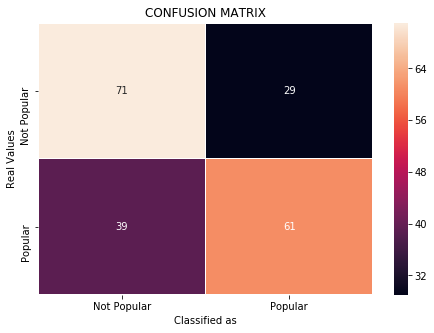

In [59]:
cmmlp=confusion_matrix(y_test, ymlp_pred_test)
display(cmmlp)
confusionMatrixHeatmap(cmmlp, labl)

## Naive Bayes

With Outliers:

In [57]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
ynb_pred_test = nbModel.predict(X_test)
display('The accuracy is:')
display(metrics.accuracy_score(y_test, ynb_pred_test))

'The accuracy is:'

0.5487147335423197

Cross Validation:

In [58]:
# cv=10 because it's been scientifically demonstrated that value is optimum for classification
# scoring is set to accuracy since accuracy is the evaluation matrix 
scoresnb = cross_val_score(nbModel, X, y, cv=10, scoring='accuracy')
display(scoresnb)
print("The mean score for cross validation is %s"%(scoresnb.mean()))

array([0.63, 0.48, 0.53, 0.51, 0.52, 0.52, 0.51, 0.49, 0.5 , 0.79])

The mean score for cross validation is 0.5485400916355415


Confusion matrix heatmap

array([[3747,   55],
       [3544,  629]])

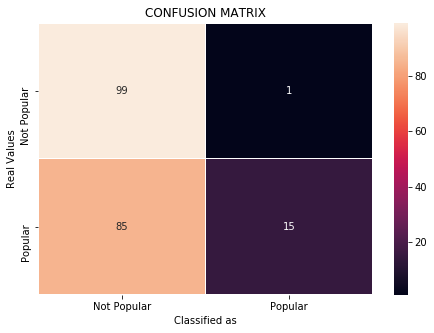

In [60]:
cmnb=confusion_matrix(y_test, ynb_pred_test)
display(cmnb)
confusionMatrixHeatmap(cmnb, labl)

Without Outliers:

In [61]:
nbOutModel=GaussianNB()
nbOutModel.fit(XOut_train, yOut_train)
yOut_pred_test_nb=nbOutModel.predict(XOut_test)
display('The accuracy is:')
display(metrics.accuracy_score(yOut_test, yOut_pred_test_nb))

'The accuracy is:'

0.3032149217358703

## Decision Tree

With outliers:

In [62]:
dtModel=tree.DecisionTreeClassifier(min_samples_leaf=100, random_state=10)
dtModel.fit(X_train,y_train)
y_pred_test_dt=dtModel.predict(X_test)
display('The accuracy is: ')
display(metrics.accuracy_score(y_test, y_pred_test_dt))

'The accuracy is: '

0.6574294670846395

array([[2623, 1179],
       [1553, 2620]])

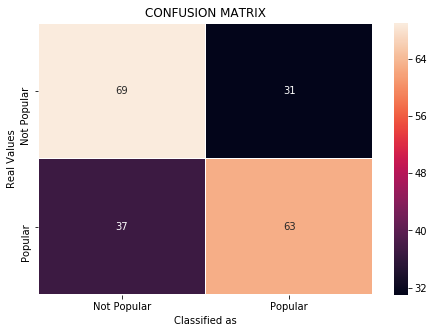

In [63]:
cmdt=confusion_matrix(y_test, y_pred_test_dt)
display(cmdt)
confusionMatrixHeatmap(cmdt, labl)

Without outliers

In [64]:
dtOutModel=tree.DecisionTreeClassifier()
dtOutModel.fit(XOut_train,yOut_train)
yOut_pred_test_dt=dtOutModel.predict(XOut_test)
display('The accuracy is: ')
display(metrics.accuracy_score(yOut_test, yOut_pred_test_dt))

'The accuracy is: '

0.3508295060455525

## Random Forest

With Outliers:

Grid Search:

In [65]:
rfModel=RandomForestClassifier()
parametersrf={'n_estimators': [10,50,100,125,150], 
               'criterion': ['gini', 'entropy'],
             'min_samples_split' : [2, 4, 6, 8, 15, 30],
             'min_samples_leaf': [10, 20, 50, 100, 150]}
GSrf= GridSearchCV(rfModel, parametersrf, n_jobs=-1)
GSrf.fit(X_train, y_train)
print('The parameters combination that would give best accuracy is : ')
print(GSrf.best_params_)

The parameters combination that would give best accuracy is : 
{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 100}


In [66]:
rfModel=RandomForestClassifier(n_estimators=100, criterion='entropy', 
                               min_samples_split=6, min_samples_leaf=10
                              , n_jobs=-1)
rfModel.fit(X_train, y_train)
y_pred_test_rf=rfModel.predict(X_test)
display('The accuracy is: ')
display(metrics.accuracy_score(y_test, y_pred_test_rf))

'The accuracy is: '

0.6732288401253919

Cross validation:

In [67]:
# cv=10 because it's been scientifically demonstrated that value is optimum for classification
# scoring is set to accuracy since accuracy is the evaluation matrix 
scoresrf = cross_val_score(rfModel, X, y, cv=10, scoring='accuracy')
print("The mean score for cross validation is %s"%(scoresrf.mean()))

The mean score for cross validation is 0.6724085471110318


Confusion matrix:

array([[2733, 1069],
       [1537, 2636]])

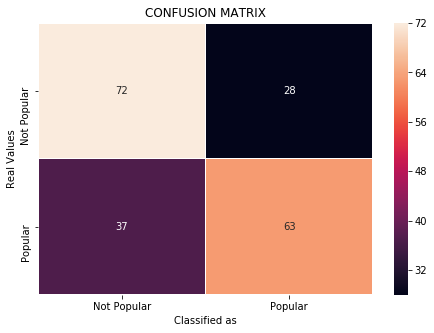

In [69]:
cmcf=confusion_matrix(y_test, y_pred_test_rf)
display(cmcf)
confusionMatrixHeatmap(cmcf, labl)

Recursive Feature Elimination - Cross Validated:

In [77]:
rfecv = RFECV(rfModel, 5)
rfecv.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfecv.support_)
print(rfecv.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True False
  True False False False False False False False False False False False
 False  True False False False False  True False False False False  True
 False False False False]
[1 1 1 1 1 1 1 1 1 1 1 2 1 3 5 2 6 5 6 3 4 5 4 5 2 1 6 2 3 4 1 6 4 3 5 1 4
 3 2 6]


In [79]:
rfecv.score(X_test, y_test)

0.6767398119122257

It slightly improves de accuracy by around 0.004

Recursive Feature Elimination:

In [80]:
rfe = RFE(rfModel, 5)
rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[ 1  2  1  1  1  8  7  1 10  4  5 12  3 20 27 15 32 31 36 16 22 28 23 30
 13  9 34 14 19 29  6 33 24 21 25 11 26 18 17 35]


In [81]:
rfe.score(X_test, y_test)

0.6494043887147335

It didn't improve the results

#### PCA

In [85]:
pca=PCA(n_components=5)
principalComponents=pca.fit_transform(X)
df_pca=pd.DataFrame(data=principalComponents, 
                    columns=['pc1','pc2','pc3','pc4','pc5'])
Xpca=df_pca
ypca=y
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Xpca,ypca,test_size=0.1)
len(Xpca_train), len(Xpca_test), len(ypca_train), len(ypca_test)

(71770, 7975, 71770, 7975)

In [86]:
rfpcaModel=RandomForestClassifier(n_estimators=100, criterion='entropy', 
                               min_samples_split=6, min_samples_leaf=10
                              , n_jobs=-1)
rfpcaModel.fit(Xpca_train, ypca_train)
ypca_pred_test_rf=rfpcaModel.predict(Xpca_test)
display('The accuracy is: ')
display(metrics.accuracy_score(ypca_test, ypca_pred_test_rf))

'The accuracy is: '

0.630846394984326

It didn't improve the results

Without Outliers:

In [87]:
rfOutModel=RandomForestClassifier()
rfOutModel.fit(XOut_train, yOut_train)
display('The score is: ')
display(rfOutModel.score(XOut_test, yOut_test))
yOut_pred_test_rf=rfOutModel.predict(XOut_test)
display('The accuracy is: ')
display(metrics.accuracy_score(yOut_test, yOut_pred_test_rf))

'The score is: '

0.34511200674852377

'The accuracy is: '

0.34511200674852377

## K Nearest Neighbours

With Outliers:

In [88]:
knnModel=KNeighborsClassifier(n_neighbors=6)
knnModel.fit(X_train, y_train)
y_pred_test_knn=knnModel.predict(X_test)
display('The accuracy is: ')
display(metrics.accuracy_score(y_test, y_pred_test_knn))

'The accuracy is: '

0.6267084639498433

Without Outliers:

In [90]:
knnOutModel=KNeighborsClassifier(n_neighbors=6)
knnOutModel.fit(XOut_train, yOut_train)
yOut_pred_test_knn=knnOutModel.predict(XOut_test)
display('The accuracy is: ')
display(metrics.accuracy_score(yOut_test, yOut_pred_test_knn))

'The accuracy is: '

0.34286249882838127

array([[2879,  923],
       [2054, 2119]])

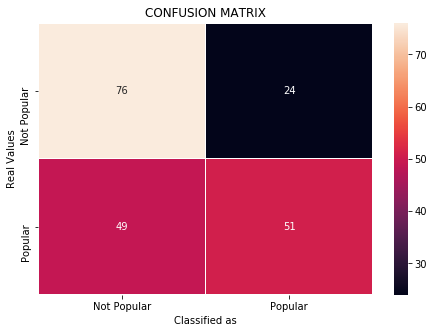

In [91]:
cmknn=confusion_matrix(y_test, y_pred_test_knn)
display(cmknn)
confusionMatrixHeatmap(cmknn, labl)

#### Cross validation

In [92]:
# cv=10 because it's been scientifically demonstrated that value is optimum for classification
# scoring is set to accuracy since accuracy is the evaluation matrix 
scoresknn = cross_val_score(knnModel, X, y, cv=10, scoring='accuracy')
print("The mean score for cross validation is %s"%(scoresknn.mean()))

The mean score for cross validation is 0.6171321429518646


## Two-class AdaBoost

In [95]:
bdt = AdaBoostClassifier(RandomForestClassifier(n_estimators=100, criterion='entropy', 
                               min_samples_split=6, min_samples_leaf=10
                              , n_jobs=-1),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(X_train,y_train)
y_pred_test_bdt= bdt.predict(X_test)
display('The accuracy is: ')
display(metrics.accuracy_score(y_test, y_pred_test_bdt))

'The accuracy is: '

0.6519122257053291

array([[2106, 1696],
       [1080, 3093]])

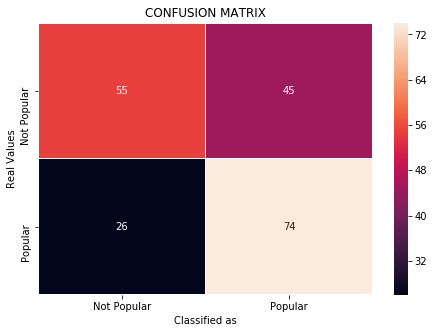

In [96]:
cmbdt=confusion_matrix(y_test, y_pred_test_bdt)
display(cmbdt)
confusionMatrixHeatmap(cmbdt, labl)

## We can conclude that the model that better fit our data is the Random Forest Model with a 67% accuracy